In [7]:
import alpaca_trade_api as tradeapi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from collections import deque

In [3]:
data = []
DATA_FOLDER_PATH = "DATA/AAPL"
for file in os.listdir(DATA_FOLDER_PATH):
    data.append(pd.read_csv(DATA_FOLDER_PATH + "/" + file))


In [4]:

df = data[0]
df.columns

Index(['timestamp', 'close', 'high', 'low', 'trade_count', 'open', 'volume',
       'vwap'],
      dtype='object')

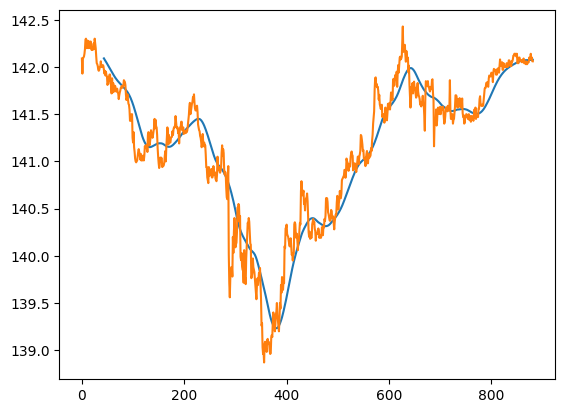

In [37]:
window = 30
filter_window = 30
filter_poly = 1
MA = np.array(savgol_filter(np.array(df['close'].rolling(window).mean()), filter_window, filter_poly))
ROC = np.gradient(MA, axis=0)
prices = df['close'].values
plt.plot(MA)
plt.plot(prices)
std = np.nanstd(ROC)
RBT = std
RST = -std

In [44]:
maxima = argrelextrema(MA, np.greater)
minima = argrelextrema(MA, np.less)
buy_window = 10
sell_window = 10
buy_indices = set()
sell_indices = set()

for i in range(len(maxima[0])):
    sell_index = maxima[0][i]
    start_index = max(0, sell_index - sell_window)
    end_index = min(sell_index + sell_window, len(prices) - 1)
    for j in range(start_index, end_index):
        if j not in sell_indices:
            sell_indices.add(j)

for i in range(len(minima[0])):
    buy_index = minima[0][i]
    start_index = max(0, buy_index - buy_window)
    end_index = min(buy_index + buy_window, len(prices) - 1)
    for j in range(start_index, end_index):
        if j not in buy_indices:
            buy_indices.add(j)

print(len(sell_indices))
print(len(buy_indices))
intersection = buy_indices.intersection(sell_indices)
print(len(intersection))

for i in intersection:
    sell_indices.remove(i)
    buy_indices.remove(i)


100
120
3


In [52]:
labels = []
BUY_LABEL = "BUY"
SELL_LABEL = "SELL"
HOLD_LABEL = "HOLD"

for i in range(window):
    labels.append("HOLD")

for i in range(window, len(prices)):
    if i in sell_indices:
        labels.append(SELL_LABEL)
    elif i in buy_indices:
        labels.append(BUY_LABEL)
    else:
        labels.append(HOLD_LABEL)

In [54]:
df['label'] = labels
df

,timestamp,close,high,low,trade_count,open,volume,vwap,label
0,2023-01-25 00:00:00+00:00,142.09,142.09,142.0000,7,142.0000,766,142.071005,HOLD
1,2023-01-25 00:01:00+00:00,141.93,142.08,141.9001,44,141.9001,12789,142.069541,HOLD
2,2023-01-25 00:02:00+00:00,142.09,142.09,141.9400,28,141.9400,2643,142.064616,HOLD
3,2023-01-25 00:03:00+00:00,142.10,142.10,142.0700,24,142.0700,675,142.090289,HOLD
4,2023-01-25 00:04:00+00:00,142.11,142.13,142.1100,20,142.1300,619,142.126107,HOLD
...,...,...,...,...,...,...,...,...,...
877,2023-01-26 00:55:00+00:00,142.14,142.15,142.1100,48,142.1100,1532,142.125904,HOLD
878,2023-01-26 00:56:00+00:00,142.09,142.14,142.0900,40,142.1400,8824,142.110403,HOLD
879,2023-01-26 00:57:00+00:00,142.10,142.14,142.1000,19,142.1400,812,142.111786,HOLD
880,2023-01-26 00:58:00+00:00,142.06,142.10,142.0100,32,142.1000,3181,142.058456,HOLD
